In [1]:
# imports 

import os

import random 
import numpy as np

import pandas as pd
from sklearn.model_selection import KFold
import seaborn as sns

import matplotlib.pyplot as plt


from scipy import optimize


%matplotlib inline

In [2]:
# Load data

data = pd.read_csv("./Data/house_data_complete.csv")
#Attributes:
# (DROP)
#id - Unique ID for each home sold
#date - Date of the home sale
#price - Price of each home sold
#sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
#sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors
#zipcode - What zipcode area the house is in
#lat - Lattitude
#long - Longitude
#yr_renovated - The year of the house’s last renovation

# 13 feature
#bedrooms - Number of bedrooms
#bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
#sqft_living - Square footage of the apartments interior living space
#sqft_lot - Square footage of the land space
#floors - Number of floors
#waterfront - A variable for whether the apartment was overlooking the waterfront or not
#view - An index from 0 to 4 of how good the view of the property was
#condition - An index from 1 to 5 on the condition of the apartment,
#grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

#sqft_above - The square footage of the interior housing space that is above ground level
#sqft_basement - The square footage of the interior housing space that is below ground level
#yr_built - The year the house was initially built







In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161200e+04,2.161200e+04,21612.000000,21612.000000,21612.000000,2.161200e+04,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000
mean,4.580402e+09,5.401775e+05,3.369471,2.114774,2079.921016,1.510739e+04,1.494332,0.007542,0.234314,3.409356,7.656904,1788.425319,291.495697,1971.006247,84.406163,98077.938645,47.560047,-122.213891,1986.582871,12768.828984
std,2.876594e+09,3.673701e+05,0.907982,0.770177,918.456818,4.142142e+04,0.539991,0.086519,0.766334,0.650668,1.175477,828.094487,442.580931,29.373636,401.688123,53.505993,0.138564,0.140829,685.392610,27304.756179
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.218375e+05,3.000000,1.750000,1426.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.250000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Text(0, 0.5, 'Count')

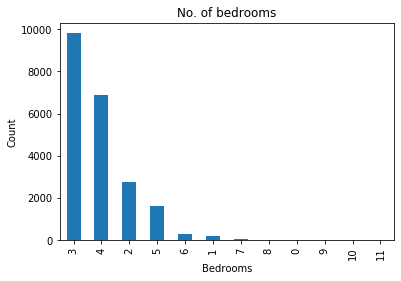

In [5]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('No. of bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')


Text(0.5, 1.0, 'Price vs. Square Feet')

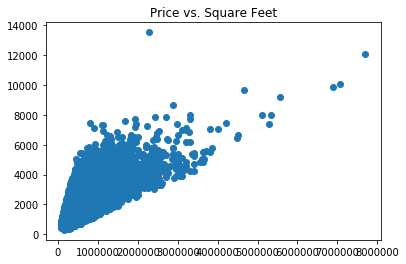

In [6]:
plt.scatter(data.price,data.sqft_living)
plt.title('Price vs. Square Feet')

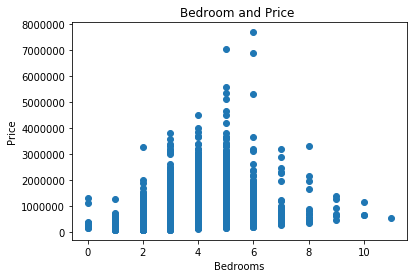

In [7]:
plt.scatter(data.bedrooms,data.price)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

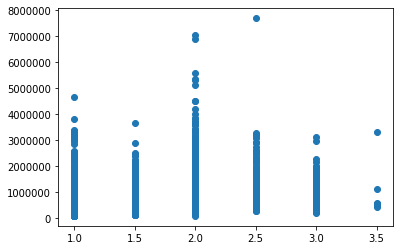

In [8]:
plt.scatter(data.floors,data.price)

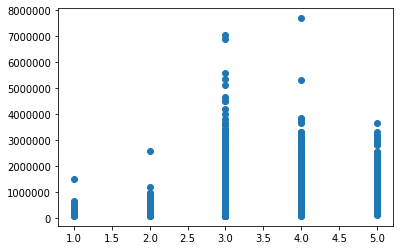

In [9]:

plt.scatter(data.condition,data.price)

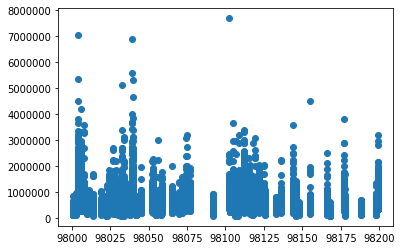

In [10]:
plt.scatter(data.zipcode,data.price)

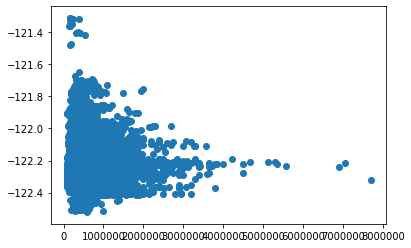

In [11]:

plt.scatter(data.price,data.long)

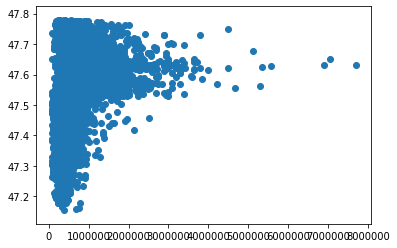

In [12]:
plt.scatter(data.price,data.lat)

In [13]:
X = data.drop(['id','date','sqft_living15','sqft_lot15','zipcode','lat','long','yr_renovated'],axis=1)
y= data.drop(['price'],axis=1)

In [14]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    
    print(mu.shape)
    print(sigma.shape)
    
    mu = np.mean(X_norm, axis = 0)

    
    sigma = np.std(X_norm , axis = 0)
    X_norm = (X_norm - mu) / sigma
    
    return X_norm, mu, sigma

In [15]:
X_norm, mu, sigma = featureNormalize(X)
print('Computed mean:', mu)
print('Computed standard deviation:', sigma)

(13,)
(13,)
Computed mean: price            540177.540163
bedrooms              3.369471
bathrooms             2.114774
sqft_living        2079.921016
sqft_lot          15107.388951
floors                1.494332
waterfront            0.007542
view                  0.234314
condition             3.409356
grade                 7.656904
sqft_above         1788.425319
sqft_basement       291.495697
yr_built           1971.006247
dtype: float64
Computed standard deviation: price            367361.604213
bedrooms              0.907961
bathrooms             0.770159
sqft_living         918.435569
sqft_lot          41420.465189
floors                0.539978
waterfront            0.086517
view                  0.766316
condition             0.650653
grade                 1.175450
sqft_above          828.075329
sqft_basement       442.570692
yr_built             29.372957
dtype: float64


In [16]:
train, validate, test = np.split(X_norm.sample(frac=1), [int(.6*len(X_norm)), int(.8*len(X_norm))])
y_train = train.price
y_test =test.price
y_validate=validate.price


In [17]:
train=train.drop(['price'],axis=1)
test=test.drop(['price'],axis=1)
validate=validate.drop(['price'],axis=1)

In [18]:
m = train.shape[0]
train = np.concatenate([np.ones((m, 1)), train], axis=1)

m = validate.shape[0]
validate = np.concatenate([np.ones((m, 1)), validate], axis=1)

m = test.shape[0]
test = np.concatenate([np.ones((m, 1)), test], axis=1)
train.shape


(12967, 13)

In [19]:
validate.shape

(4322, 13)

In [20]:
def computeCostMulti(X, y, theta):
    m = y.shape[0] 
    J = 0
    
    h = X.dot(theta)
    
    J = 1/(2*m)*np.sum(np.square(h-y))
    
    return J

In [21]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    m = y.shape[0] 
   
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        
        ht = np.dot(X, theta)
        ht_minus_y = ht - y 
        s = np.dot(ht_minus_y , X)
        
        theta = theta - alpha * (1/m) * s
       
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

[-0.00424549 -0.10342781  0.10027004  0.21825936 -0.02442566  0.04225632
  0.12144043  0.09194489  0.03850782  0.38846963  0.18631884  0.10432486
 -0.28946595]


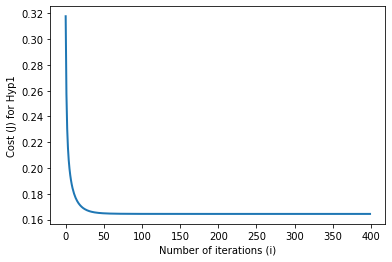

In [22]:
alpha = 0.1
num_iters = 400
theta = np.zeros(13)
theta, J_history = gradientDescentMulti(train, y_train, theta, alpha, num_iters)

plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Number of iterations (i)')
plt.ylabel('Cost (J) for Hyp1')

print(str(theta))

In [23]:

#     Hypothesis 2
# train_h2 = 1 + X^2 + X + X
train_h2 = np.zeros((train.shape[0],4))
train_h2[:,0] = 1
train_h2[:,1] = train[:,2] * train[:,2] 
train_h2[:,2] = train[:,5] 
train_h2[:,3] = train[:,9]
    

    

[-0.15796138  0.15043728 -0.04654191  0.62432132]


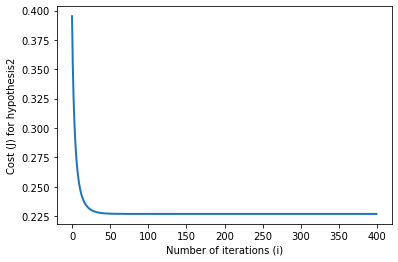

In [24]:
alpha = 0.1
num_iters = 400
theta = np.zeros(4)
theta, J_history = gradientDescentMulti(train_h2, y_train, theta, alpha, num_iters)

plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Number of iterations (i)')
plt.ylabel('Cost (J) for hypothesis2')

print(str(theta))

In [25]:

#     Hypothesis 3
# train_h3 = 1 + X^2 + X^2 + X
train_h3 = np.zeros((train.shape[0],4))
train_h3[:,0] = 1
train_h3[:,1] = train[:,3] * train[:,3]
train_h3[:,2] = train[:,2] * train[:,4]
train_h3[:,3] = train[:,4]

[-0.2293298   0.2276261  -0.03350959  0.03119571]


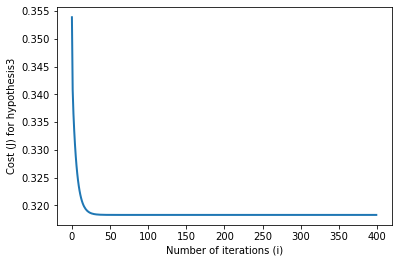

In [26]:
alpha = 0.1
num_iters = 400
theta = np.zeros(4)
theta, J_history = gradientDescentMulti(train_h3, y_train, theta, alpha, num_iters)

plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Number of iterations (i)')
plt.ylabel('Cost (J) for hypothesis3')

print(str(theta))

In [27]:
X_new = pd.read_csv("./Data/house_data_complete.csv")

In [28]:
kf = KFold(n_splits=3)
kf.get_n_splits(X)
print(kf)
KFold(n_splits=3, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    

KFold(n_splits=3, random_state=None, shuffle=False)
TRAIN: [ 7204  7205  7206 ... 21609 21610 21611] TEST: [   0    1    2 ... 7201 7202 7203]
TRAIN: [    0     1     2 ... 21609 21610 21611] TEST: [ 7204  7205  7206 ... 14405 14406 14407]
TRAIN: [    0     1     2 ... 14405 14406 14407] TEST: [14408 14409 14410 ... 21609 21610 21611]
